# COSC 130-Project 01
**Andrew Speck**

The goal of this project is to estimate the MPG for vehicles based on their weight. This program will be using linear regression to create a linear model. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Importing and Viewing the Data
The first tasks will be to import and view the data.


In [2]:
df = pd.read_table(filepath_or_buffer='auto_data.txt', sep='\t')
weight = list(df.wt)
mpg = list(df.mpg)
ln_mpg = list(df.ln_mpg)

Next we will confirm each list contains 398 values. 

In [3]:
print(len(weight))
print(len(mpg))
print(len(ln_mpg))

398
398
398


Now we will review the information from the first 10 vehicles in the dataset.

In [4]:
print("Weight   MPG   LN_MPG")

print("----------------------")

total = 10
for i in range(total):
    print(F'{weight[i]:<6}{mpg[i]:>6}{ln_mpg[i]:>10}')

Weight   MPG   LN_MPG
----------------------
3190    27.2    3.3032
1985    32.8    3.4904
3410    18.1    2.8959
4080    17.5    2.8622
3530    25.4    3.2347
1773    31.0     3.434
2670    27.4    3.3105
1755    39.1    3.6661
2188    34.3    3.5351
2155    30.0    3.4012


Next we will create two scatter plots. The first, will compare the relationship between weight and the MPG of the vehicles. The second, will compare the natural log of MPG the weight.

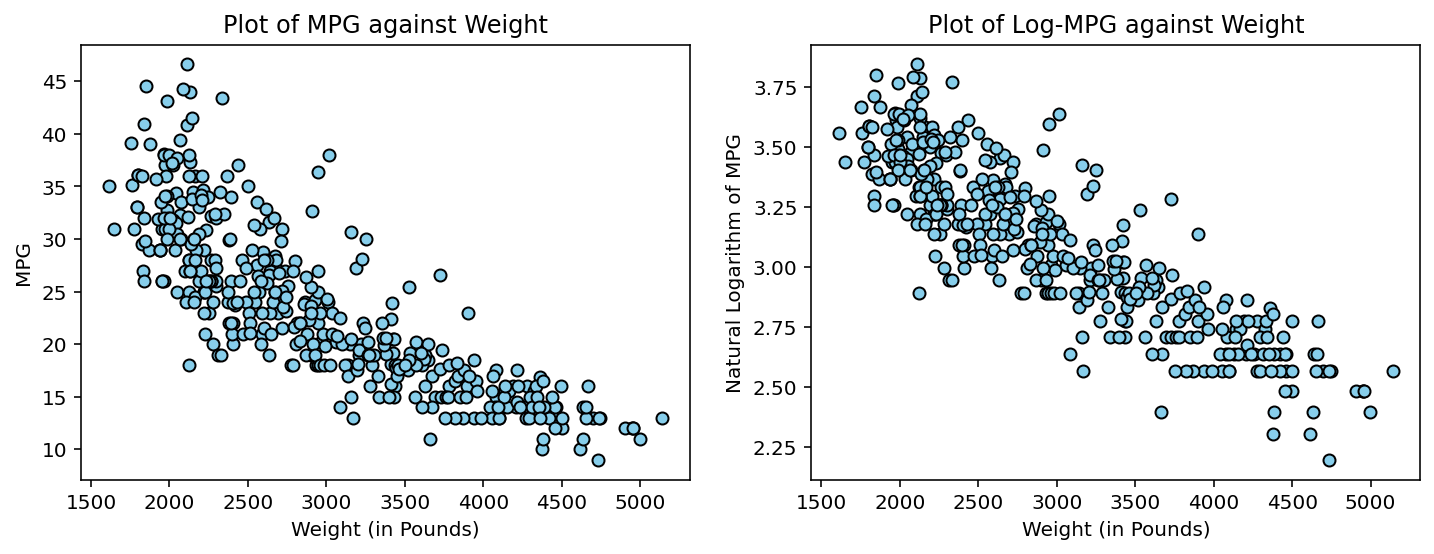

In [5]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(weight, mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('MPG')
plt.title('Plot of MPG against Weight')
plt.subplot(1,2,2)
plt.scatter(weight, ln_mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Plot of Log-MPG against Weight')
plt.show()

After comparing the two models, we can see that the MPG against weight has a slight curve. The Log-MPG against weight appears more linear. Therefore, we will be using the Log-MPG dataset as our response variable.

## Part 2: Splitting the Data
In this section we will be splitting the data into two sets: The Training Set and the Test Set.

In [6]:
x_train = weight[0:300]
x_test = weight[300:398]

y_train = ln_mpg[0:300]
y_test = ln_mpg[300:398]

mpg_train = mpg[0:300]
mpg_test = mpg[300:398]

n_train = len(x_train)
n_test = len(x_test)

print("Traing Set Size:", n_train)
print("Test Set Size:  ", n_test)

Traing Set Size: 300
Test Set Size:   98


Now, we will create scatter plots to visualize the data and trading sets!

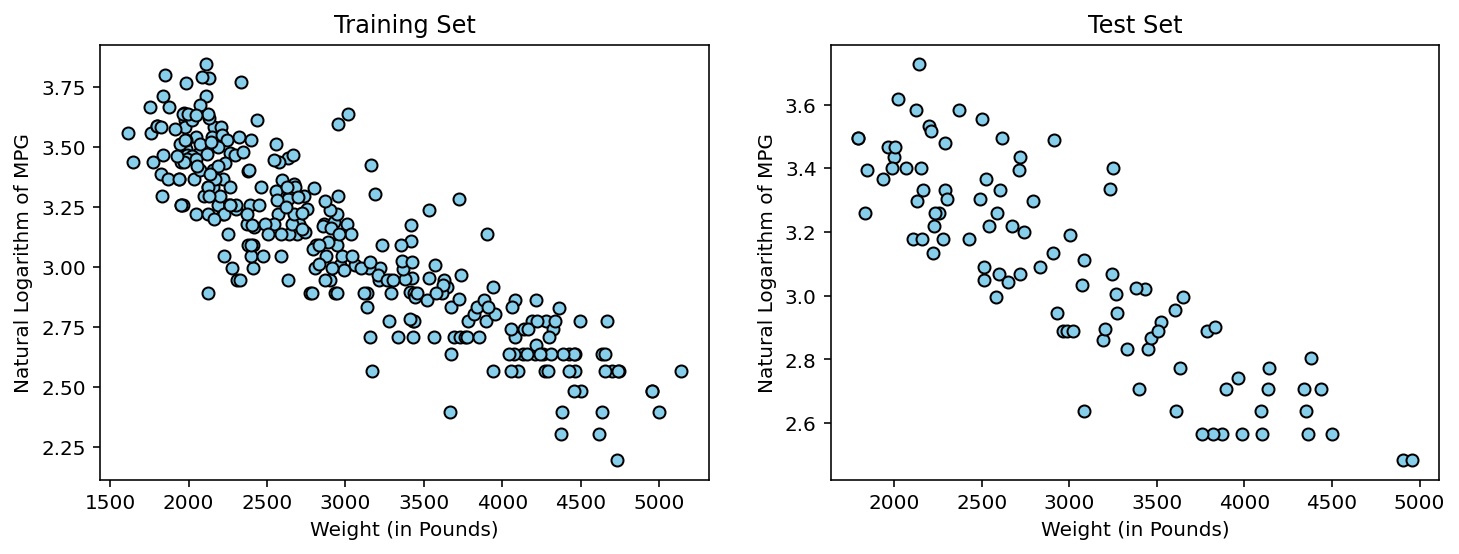

In [7]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

## Part 3: Descriptive Statistics
Next, we are going to calculate the mean of "X", which will be our weight. Then we will calculate "Y" which is the Log-MPG. 

In [8]:
mean_x = sum(x_train) / n_train
mean_y = sum(y_train) / n_train

print("Mean of X = ", round(mean_x, 2))
print("Mean of Y = ", round(mean_y, 4))

Mean of X =  2968.62
Mean of Y =  3.1069


We will now be calculating Sxx and Syy.

In [9]:
Sxx = 0
for i in range(len(x_train)):
    Sxx +=((x_train[i] - mean_x) ** 2 + (x_train[i] - mean_x) ** 2)
print("Sxx = ", round(Sxx, 2))

Syy = 0
for i in range(len(y_train)):
    Syy +=((y_train[i] - mean_y) ** 2 + (y_train[i] - mean_y) ** 2)
print("Syy = ", round(Syy, 4))



Sxx =  448013840.87
Syy =  72.1492


Now, we will be calculating for the variance of the training values of X and Y.

In [10]:
var_x = Sxx / ((n_train) - 1 )
var_y = Syy / ((n_train) - 1 )

print("Variance of X = ", round(var_x, 2))
print("Variance of Y = ", round(var_y, 4))

Variance of X =  1498374.05
Variance of Y =  0.2413


## Part 4: Linear Regression Model
Next, we will calculate Sxy, which is needed to find the coefficients for the linear regression model.

In [11]:
Sxy = 0
for i in range(len(x_train)):
    Sxy +=(((x_train[i] - mean_x) * (y_train[i] - mean_y)) + ((x_train[i] - mean_x) * (y_train[i] - mean_y)))


print("Sxy =", round(Sxy, 2))




Sxy = -157998.27


Now, we will be calculating the coefficients for the model.

In [12]:
beta_1 = Sxy / Sxx
beta_0 = mean_y - beta_1 * mean_x

print("beta_0 = ", round(beta_0 ,4))
print("beta_1 =", round(beta_1 ,8))

beta_0 =  4.1538
beta_1 = -0.00035266


Now that we have found our coeeficents, we may now visualize the regression line and begin training.

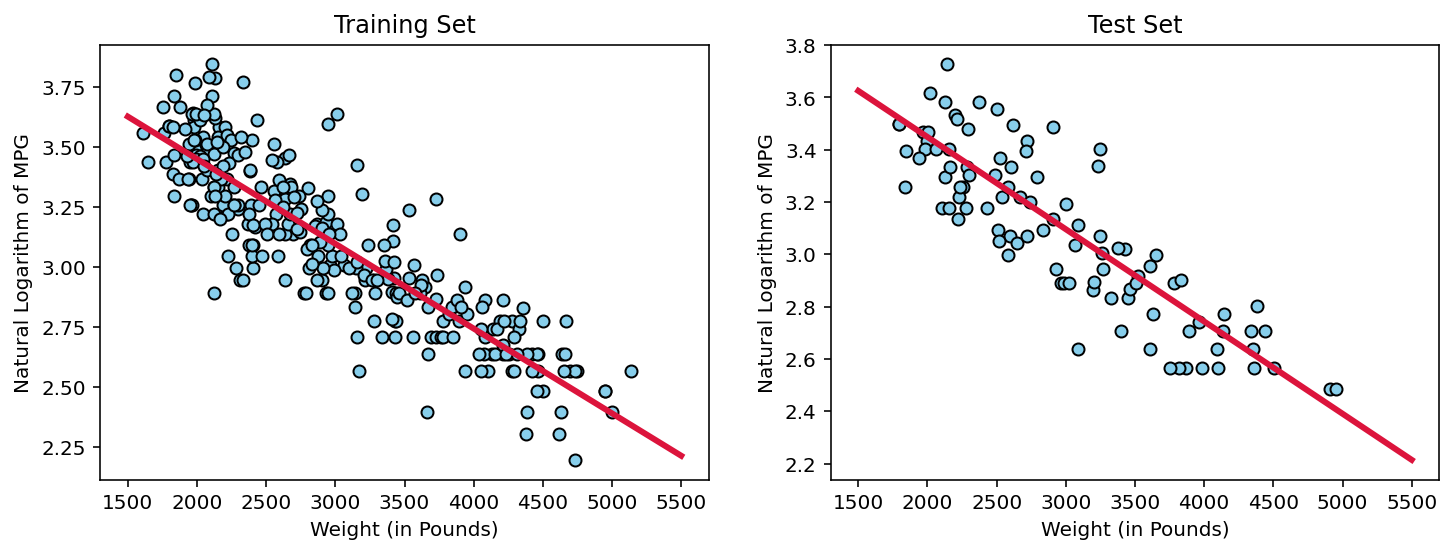

In [13]:
y_vals = [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5500]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

## Part 5: Training Score
Now, let's calculate the training r-squared score. To start we will calculate the estimated response values for the training set.

In [14]:
pred_y_train = []
for i in range(len(x_train)):
    pred_y_train.append(((beta_0) + (beta_1)) * (x_train[i]))



Next, we will calculate the residuals for the training set.

In [29]:
error_y_train = []
for i in range(len(pred_y_train)):
    error_y_train.append((y_train[i])-(pred_y_train[i]))


Now, we will display the first 10 true and predicted Y values along with their residual.

In [44]:
print("True Y            Pred Y          Error")

print("------------------------------------------------------")


total = 10
for i in range(total):
    print(F'{y_train[i]:<10}{pred_y_train[i]:>15}){error_y_train[i]:>25}')

True Y            Pred Y          Error
------------------------------------------------------
3.3032    13249.651210934522)      -13246.348010934522
3.4904    8244.688919656748)       -8241.198519656748
2.8959    14163.420259964489)       -14160.52435996449
2.8622    16946.26236382848)       -16943.40016382848
3.2347    14661.839741253561)       -14658.60504125356
3.434     7364.147836046052)       -7360.713836046052
3.3105    11089.833458681873)      -11086.522958681873
3.6661    7289.384913852691)       -7285.718813852691
3.5351    9087.848542170763)       -9084.313442170764
3.4012    8950.783184816268)       -8947.381984816268


Next, let's calculate the sum of squared errors score for the training set.

In [61]:
sse_train = 0
for i in range(len(error_y_train)):
    sse_train+=(error_y_train[i] ** 2)
print("Training SSE = ", round(sse_train, 4))


Training SSE =  49452019781.2104


In [64]:
r2_train = (1 - (sse_train / Syy))
print("Training r-Squared = ", round(r2_train, 4))

Training r-Squared =  -685413023.078


## Part 6: Test Score 
We will now be calculating the r-squared score and its estimated response values

In [68]:
pred_y_test = []
for i in range(len(x_test)):
    pred_y_test.append(((beta_0) + (beta_1)) * (x_test[i]))

now we will calculate residuals for test sets 

In [69]:
error_y_test = []
for i in range(len(pred_y_test)):
    error_y_test.append((y_test[i])-(pred_y_test[i]))


Now we will display the values mentioned above

In [71]:
print("True Y            Pred Y          Error")

print("------------------------------------------------------")


total = 10
for i in range(total):
    print(F'{y_test[i]:<10}{pred_y_test[i]:>15}){error_y_test[i]:>25}')

True Y            Pred Y          Error
------------------------------------------------------
2.6391    12817.68766048399)       -12815.04856048399
2.8904    15720.981138992842)      -15718.090738992842
2.9957    15164.412718220043)      -15161.417018220043
2.5649    16074.0282715726)      -16071.463371572601
2.9957    10724.325839069885)      -10721.330139069885
2.9444    12169.742334808197)      -12166.797934808197
2.4849    20377.049793368264)      -20374.564893368264
3.2581    9366.132752557161)       -9362.874652557162
3.7257    8905.094732364769)       -8901.369032364768
2.5649    16564.140761506857)      -16561.575861506855


now we will calculate the sum of squared errors score 

In [72]:
sse_test = 0
for i in range(len(error_y_test)):
    sse_test+=(error_y_test[i] ** 2)
print("Test SSE = ", round(sse_test, 4))

Test SSE =  16012518858.5326


In [73]:
r2_test = (1 - (sse_test / Syy))
print("Test r-Squared = ", round(r2_test, 4))

Test r-Squared =  -221936110.4569


now we will plot the tests to visze errors.

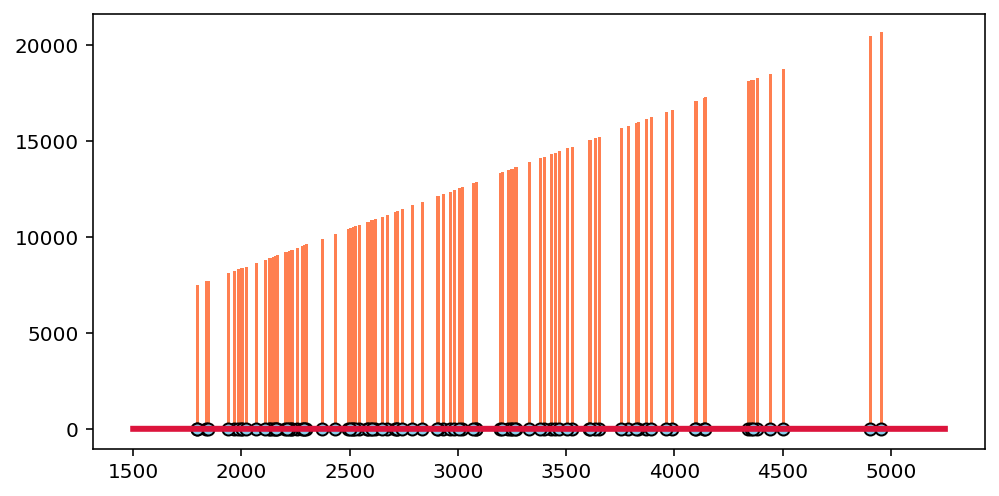

In [74]:
plt.figure(figsize=[8,4])
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5250], [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5250],
 c='crimson', lw=3)
for i in range(n_test):
 plt.plot([x_test[i], x_test[i]], [pred_y_test[i], y_test[i]],
 c='coral', zorder=0)
plt.show()